In [39]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import os
from pathlib import Path
import numpy as np

In [40]:
path = Path(input("请输入路径："))

In [41]:
os.chdir(path)
print(f"当前路径为:{os.getcwd()}")

当前路径为:/Users/wangshuaibo/Documents/北京悦动/脑卒中项目/阿帅笔记/测试数据及分析结果/20230421医院鞋垫数据检验


In [47]:
for file in os.listdir():
    if ".csv" in file:
        print(file)


hwshuai_丁冠宏-走40步路-鞋垫4-1-604F-V4.16-014_202304211216193530.csv
hwshuai_丁冠宏-走40步路-鞋垫4-1-604F-V4.16-013_202304211209071330.csv


In [48]:
file = "hwshuai_丁冠宏-走40步路-鞋垫4-1-604F-V4.16-014_202304211216193530.csv"

In [55]:
# 走40步路
file = "/Users/wangshuaibo/Documents/北京悦动/脑卒中项目/阿帅笔记/测试数据及分析结果/20230420鞋垫测试/hwshuai_丁冠宏-走6步路-鞋垫2-1-41AB-V4.16-006_202304201530532020.csv"

In [63]:
# 跑步机走 10 分钟
file = "/Users/wangshuaibo/Documents/北京悦动/脑卒中项目/阿帅笔记/测试数据及分析结果/20230421跑步机走路测试/Done/hwshuai_丁冠宏-跑步机走路10分钟-鞋垫2-1-41AB-V4.01-002_202304211610535380.csv"

In [64]:
df = pd.read_csv(file)
L_data = df[df["part"]=="L"]
R_data = df[df["part"]=="R"]
R_data.columns

Index(['part', 'timestamp', 'gx', 'gy', 'gz', 'ax', 'ay', 'az', 'qw', 'qx',
       'qy', 'qz', 'p1', 'p2', 'p3', 'p4', 'p5', 'p6', 'p7', 'p8', 'p9', 'p10',
       'p11', 'p12', 'p1-c', 'p2-c', 'p3-c', 'p4-c', 'p5-c', 'p6-c', 'p7-c',
       'p8-c', 'p9-c', 'p10-c', 'p11-c', 'p12-c'],
      dtype='object')

In [65]:
sensors = ['p1-c', 'p2-c', 'p3-c', 'p4-c', 'p5-c', 'p6-c', 'p7-c',
       'p8-c', 'p9-c', 'p10-c', 'p11-c', 'p12-c']

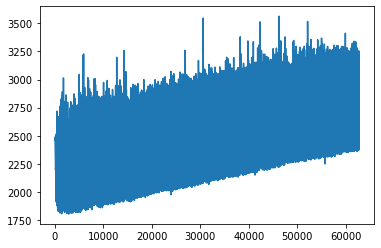

In [66]:
# 选择一个传感器
L_data["p1-c"].plot()
p1 = L_data["p1-c"]

In [133]:
p1.describe()

count    31380.000000
mean      2364.331198
std        366.431157
min       1804.000000
25%       2078.000000
50%       2297.000000
75%       2614.000000
max       3563.000000
Name: p1-c, dtype: float64

In [136]:
# 以快跑 16km/h ，对应至少间隔 22 个数
peaks,_ = find_peaks(-p1,-p1.max(),width=20)
L_shape = p1.shape

In [77]:
peakls = peaks.tolist()

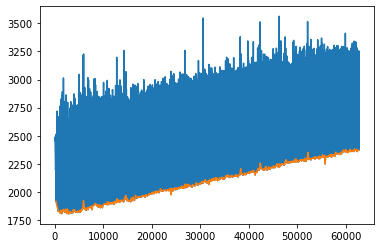

In [84]:
# 查找峰值并绘制图片
p1.plot()
plt.plot(peaks*2,p1.iloc[peakls])

下面的内容写循环，写 i+1 可能会超出量程，所以要写 if 判断函数

In [128]:
df_calibre = pd.DataFrame({})
for i in range(len(peakls)):

    # 选取两个波谷之间的区间
    range_start = peakls[i]
    if i < len(peakls)-1:
        range_end = peakls[i+1]
    else:
        range_end = L_shape[0]
    

    # 选取区间内数值
    snip_data= p1.iloc[range_start:range_end]
    # 进行校准
    calibre_p1_snip = snip_data.apply(lambda x: x-p1.iloc[range_start])
    """ 
    #绘图显示
    p1.plot()
    calibre_p1_snip.plot() 
    """

    #print(df_calibre)
    #print(calibre_p1_snip)

    # 将当前生成的 Series 与 df_calibre 拼接
    df_calibre = pd.concat([df_calibre.reset_index(drop=True), 
                                 calibre_p1_snip.reset_index(drop=True)],axis=0)
    
    # 重置一下索引，使得索引是唯一的
    df_calibre.reset_index(drop=True, inplace=True)
df_calibre.columns = ["calibre_p1"]